# House Prices Group 5 
# (Aleksandar, Arthur, Cyrill, Selina)

## Load packages

In [460]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 10

## Load data and initial EDA

In [461]:
# Load data
df = pd.read_csv("GroupProjectDataSet.csv", sep=',')
print('Shape of data frame:', df.shape)
df.head(10)

Shape of data frame: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Class
0,530.0,20.0,RL,NaN,32668.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Alloca,2.0
1,492.0,50.0,RL,79.0,9490.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,NaN,0.0,8.0,2006.0,WD,Normal,1.0
2,460.0,50.0,RL,NaN,7015.0,Pave,NaN,IR1,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,1.0
3,280.0,60.0,RL,83.0,10005.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2008.0,WD,Normal,1.0
4,656.0,160.0,RM,21.0,1680.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2010.0,WD,Family,0.0
5,1014.0,30.0,RM,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2009.0,WD,Normal,0.0
6,1404.0,20.0,RL,49.0,15256.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,2.0
7,602.0,50.0,RM,50.0,9000.0,Pave,NaN,Reg,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2007.0,WD,Normal,1.0
8,1183.0,60.0,RL,160.0,15623.0,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,0.0,7.0,2007.0,WD,Abnorml,4.0
9,688.0,160.0,FV,NaN,5105.0,Pave,NaN,IR2,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Normal,1.0


### Overview

The data set consists of 1460 observations with 81 variables (including the target variable "(prize) class" and the id variable). 79 variables are descriptive variables that should explain Class.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities

## Handling Missing Data

<AxesSubplot:>

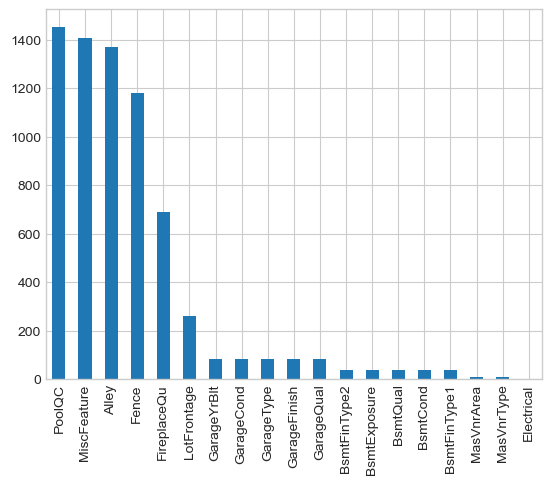

In [462]:
# Plot missing values

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.plot.bar()

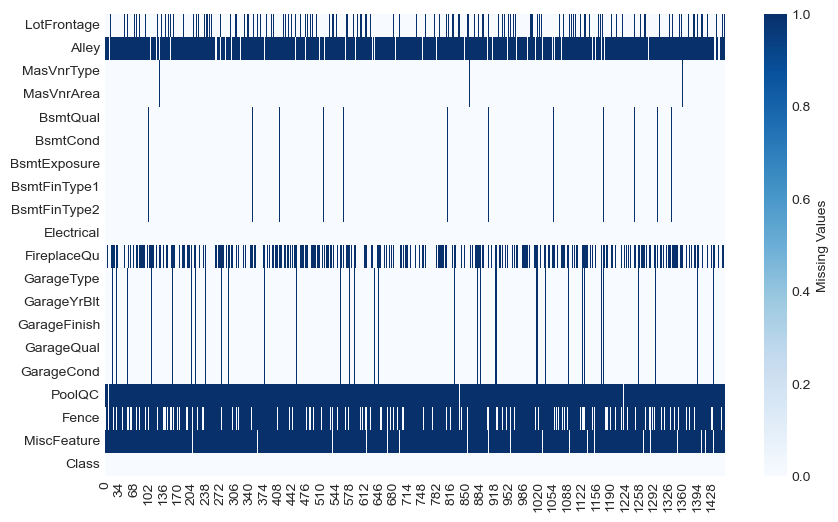

In [463]:
# Plot missing values 2.0
plt.figure(figsize=(10, 6))
sns.heatmap(df_nan.isna().transpose(),
            cmap="Blues",
            cbar_kws={'label': 'Missing Values'});

In [464]:
# Percentage of missing values for the variables

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Nr. of missing values', 'Share'])
missing_data.head(20)

,Nr. of missing values,Share
PoolQC,1453.0,0.995205
MiscFeature,1406.0,0.963014
Alley,1369.0,0.937671
Fence,1179.0,0.807534
FireplaceQu,690.0,0.472603
LotFrontage,259.0,0.177397
GarageYrBlt,81.0,0.055479
GarageCond,81.0,0.055479
GarageType,81.0,0.055479
GarageFinish,81.0,0.055479


19 variables have missing values. Of the 19 variables four (PoolQC, MiscFeature, Alley, Fence) have more than 50% missing data and one (FireplaceQu) with nearly 50% missing data. But often NA does not mean that there is no data available. Instead (especially for thecategorical variables) it means that the house is lacking this specific object. NA in the PoolQC variable means that there is no pool; NA in the Alley variable means that there is "no alley access". All the descriptions of which NA stand for non-available data and which stand for a missing trait can be found in the [data description](https://www.openml.org/search?type=data&sort=runs&id=42165&status=active).

The following variables have NAs that can be filled:

- PoolQC: Na = No Pool
- MiscFeature: Na = None
- Alley: NA = No alley access
- Fence: NA = No Fence
- FireplaceQu: NA = No Fireplace
- GarageCond: NA = No Garage
- GarageType: NA = No Garage
- GarageFinish: NA = No Garage
- GarageQual: NA = No Garage
- BsmtFinType2: NA = No Basement
- BsmtExposure: NA = No Basement
- BsmtQual: NA = No Basement
- BsmtCond: NA = No Basement
- BsmtFinType1: NA = No Basement


In [465]:
# Filling missing values for variables where appropriate

df["PoolQC"] = df["PoolQC"].fillna(value = "None")
df["MiscFeature"] = df["MiscFeature"].fillna(value = "None")
df["Alley"] = df["Alley"].fillna(value = "None")
df["Fence"] = df["Fence"].fillna(value = "None")
df["FireplaceQu"] = df["FireplaceQu"].fillna(value = "None")
df["GarageCond"] = df["GarageCond"].fillna(value = "None")
df["GarageType"] = df["GarageType"].fillna(value = "None")
df["GarageFinish"] = df["GarageFinish"].fillna(value = "None")
df["GarageQual"] = df["GarageQual"].fillna(value = "None")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(value = "None")
df["BsmtExposure"] = df["BsmtExposure"].fillna(value = "None")
df["BsmtQual"] = df["BsmtQual"].fillna(value = "None")
df["BsmtCond"] = df["BsmtCond"].fillna(value = "None")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(value = "None")


<AxesSubplot:>

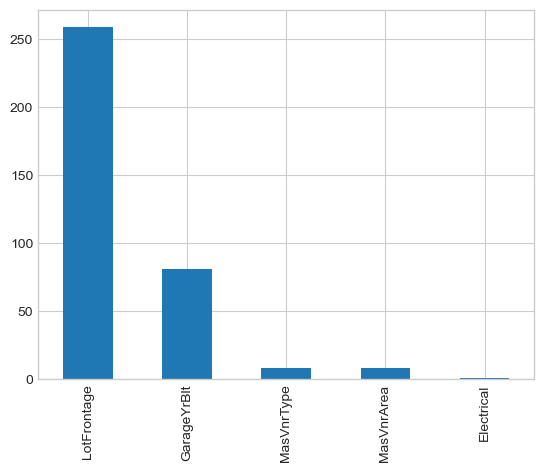

In [466]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.plot.bar()

In [467]:
# Percentage of missing values for the variables

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Nr. of missing values', 'Share'])
missing_data.head(5)

,Nr. of missing values,Share
LotFrontage,259.0,0.177397
GarageYrBlt,81.0,0.055479
MasVnrType,8.0,0.005479
MasVnrArea,8.0,0.005479
Electrical,1.0,0.000685


For all but five variables we coud fill the missing data because with them NA indicates the lack of the corresponding trait. For LotFrontage we miss 17% of the values and 5.5% for GarageYrBlt. 

- LotFrontage ---> High Correlation with other variable?
- GarageYrBlt can probably be ignored since it highly correlates with YearBuilt. 
- MasVnrType and MasVnrArea have a strong correaltion with "YearBuilt" and "OverallQual" ---> Delete them?
- Electrical one missing value ---> Delete this observation or just leave it?



## Feature Engineering

### Dealing with Categorical Features (Encoding Categorical Variables) / Splitting Into X and y

In [468]:
# Numerical variables that should be handled as categorical variables
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})
df = df.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

In [493]:
# Assign response to y
y = df.iloc[:, -1]

# Factorize categorical values, assign output to X
# create (multiple) dummy variables for a categorical variable
# panda way
X = pd.get_dummies(df.iloc[:, :-1])
X.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,530.0,NaN,32668.0,6.0,3.0,1957.0,1975.0,NaN,1219.0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,492.0,79.0,9490.0,6.0,7.0,1941.0,1950.0,0.0,403.0,165.0,...,0,0,0,1,0,0,0,0,1,0
2,460.0,NaN,7015.0,5.0,4.0,1950.0,1950.0,161.0,185.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,280.0,83.0,10005.0,7.0,5.0,1977.0,1977.0,299.0,392.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,656.0,21.0,1680.0,6.0,5.0,1971.0,1971.0,381.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [536]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

(1460, 80)

In [537]:
# Encode some categorical features as ordered numbers when there is information in the order
# see "A study on Regression applied to the Ames dataset"

### Partitioning of the Data Set Into Train and Test Set

We are using a 70/30 (training/testing) splitting. (The parameter `random_state=0` fixes the random split in a way such that results are reproducible.)

In [544]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    stratify=y)

A stratified sample is one that maintains the proportion of values as in the original data set. If, for example, the response vector $y$ is a binary categorical variable with 25% zeros and 75% ones, `stratify=y` ensures that the random splits have 25% zeros and 75% ones too. Note that `stratify=y` does not mean `stratify=yes` but rather tells the function to take the categorical proportions from response vector `y`.

In [555]:
cols_scl = X.columns.values
cols_scl

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

### Feature Scaling

In [563]:
from sklearn.preprocessing import MinMaxScaler 

# Get cols to scale
cols_scl = X.columns.values[:6]

# Apply MinMaxScaler on continuous columns only (check dummies!!!)
mms = MinMaxScaler()
#X_train_norm = mms.fit_transform(X_train[cols_scl])  # fit & transform
#X_test_norm  = mms.transform(X_test[cols_scl])  # ONLY transform

In [564]:
from sklearn.preprocessing import StandardScaler 

# Apply StandardScaler on continuous columns only
stdsc = StandardScaler()
#X_train_std = stdsc.fit_transform(X_train[cols_scl])  # fit & transform
#X_test_std  = stdsc.transform(X_test[cols_scl])  # ONLY transform

## Assessing Target Variable "Class"

** Assess Class imbalance. You make your own assessment on potential effects of class-imbalance. **

<AxesSubplot:title={'center':'Distribution of Class'}, xlabel='Class', ylabel='Count'>

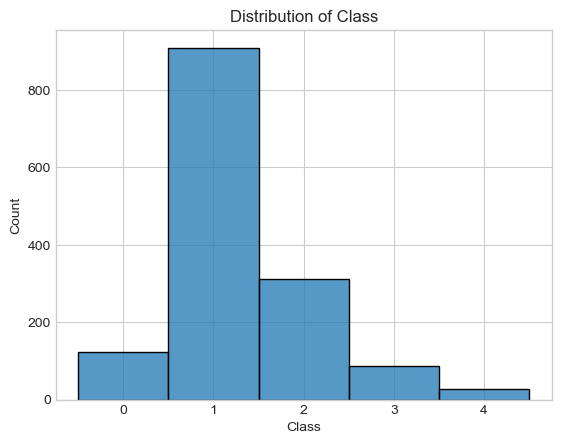

In [565]:
plt.figure(1); plt.title('Distribution of Class')
sns.histplot(data=y, discrete = True)

We see that our "Class" deviates from the normal distribution, is positively skewed and shows peakedness (cortosis).

In [566]:
#skewness and kurtosis
print("Skewness: %f" % df['Class'].skew())
print("Kurtosis: %f" % df['Class'].kurt())

Skewness: 1.100106
Kurtosis: 1.768369


## Splitting the data 

In [567]:
# Asign columns to feature matrix X and response vector y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [568]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

# Cross Validation


# Decision Trees